In [1]:
import pandas as pd

In [3]:
unData =  pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/un/un.csv')
unData.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
unData.shape
#unData.dtypes #gives data types
#unData.info()  #gives total rows of non null values and datatype for each column
#207-unData.count()  gives non null rows for all

(207, 14)

From above relevant columns with least missing values are country, lifeMale,  lifeFemale, infantMortality, GDPperCapita could be used for analysis
GDP as dependant vector y and matrix of rest (X).
Except for country and region all the columns are of float type.

In [6]:
#vq is vector quantization
#vq.whiten:  All it does is remaps the values by dividing its standard dev
#So vq.whiten parameters if needs to be plotted along with original, orig val to be devided by st dev 

from scipy.cluster import vq

#vq.whiten simply devides each value by std dev to normalize the values
df_gdp_lifemale = vq.whiten(unData[['lifeMale', 'GDPperCapita']].dropna())
df_gdp_lifefemale=vq.whiten(unData[['lifeFemale', 'GDPperCapita']].dropna())
df_gdp_infantMortality = vq.whiten(unData[['infantMortality', 'GDPperCapita']].dropna())
df_gdp_lifemale[-5:]
#df_gdp_lifemale[:,0] #working with numpy array
len(df_gdp_lifemale)

190

In [49]:
#Finding correlations
np.corrcoef(df_gdp_lifemale[:, 0], df_gdp_lifemale[:, 1])

array([[ 1.        ,  0.55716157],
       [ 0.55716157,  1.        ]])

In [51]:
np.corrcoef(df_gdp_lifefemale[:, 0], df_gdp_lifefemale[:, 1])

array([[ 1.        ,  0.54951409],
       [ 0.54951409,  1.        ]])

In [52]:
np.corrcoef(df_gdp_infantMortality[:, 0], df_gdp_infantMortality[:, 1])

array([[ 1.        , -0.51086227],
       [-0.51086227,  1.        ]])

The life expectancy and infant mortality data are moderately correlated

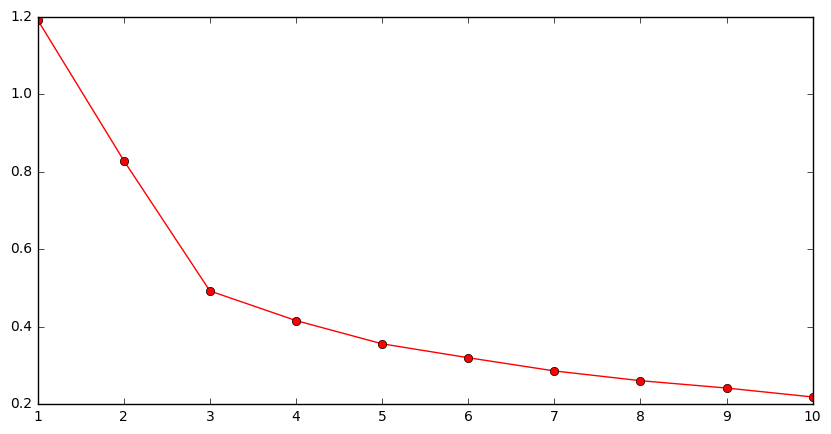

In [7]:
#k= cluster having a seperate centroid, algo checks for mean dist in normalized data for k 1 to 10

import matplotlib.pyplot as plt
%matplotlib inline
k_list = range(1, 11)   
dist_list = []
centroid_list=[]

for k in k_list:
    centroids, dist = vq.kmeans(df_gdp_lifemale, k)
    dist_list.append(dist)
    #will save list of list co-ordinates (x lifeMale, y GDPPerCapita) of centroids for each k
    centroid_list.append(centroids)  

plt.figure(figsize=(10,5))
plt.plot(k_list, dist_list, c='r', linestyle='-', marker='o')



In [9]:
#find centroid and distance of all columns desired
def find_dist(df_cols, k_list = range(1, 11)):
    distance=[]
    for k in k_list:
        centroids, dist = vq.kmeans(df_cols, k)
        distance.append(dist)
        #will save list of list co-ordinates (x lifeMale, y GDPPerCapita) of centroids for each k
        centroid_list.append(centroids)  
    return (distance, centroid_list)
lifeFem_km=find_dist(df_gdp_lifefemale)
infantMor_km=find_dist(df_gdp_infantMortality)

#lifeFem_km[0]
#infantMor_km[0]

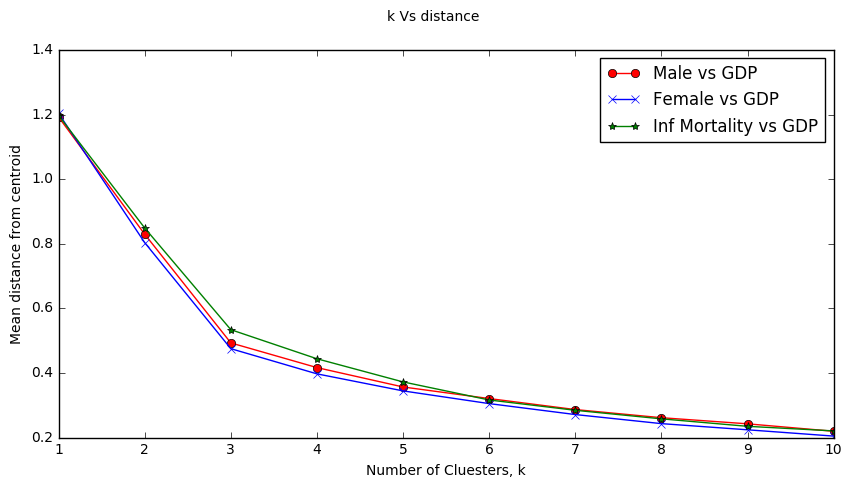

In [10]:
#Plotting all elbows in same fig
plt.figure(figsize=(10,5))
plt.plot(k_list, dist_list, c='r', linestyle='-', marker='o', label='Male vs GDP')
plt.plot(k_list, lifeFem_km[0], c='b', linestyle='-', marker='x', label='Female vs GDP')
plt.plot(k_list, infantMor_km[0], c='g', linestyle='-', marker='*', label='Inf Mortality vs GDP')
plt.legend()
plt.suptitle('k Vs distance')
plt.xlabel('Number of Cluesters, k')
plt.ylabel('Mean distance from centroid')
plt.show()

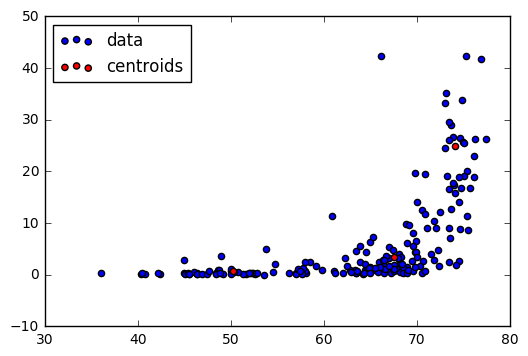

In [12]:
#Plotting centroids alongside the data

#centroid_list[9]
#plt.scatter(unData2.lifeMale, unData2.GDPperCapita/1000)
plt.scatter(unData.lifeMale, unData.GDPperCapita/1000, label='data')
#data[:, [1, 9]]
xs=centroid_list[2][:, 0].tolist()
xs=[x*9.786 for x in xs]
ys=centroid_list[2][:, 1].tolist()
ys=[i*9.786 for i in ys]
plt.scatter(xs, ys, c='r', label='centroids')
plt.legend(loc='upper left')
plt.show()

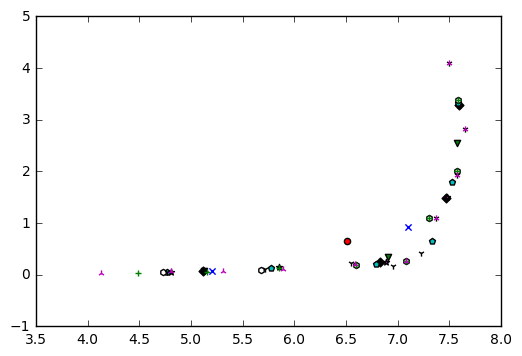

In [17]:
#visualizing the locations of centroids for different numbers of k (clusters)
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.clf()
#colors=(cm.rainbow(range(10))    Not working

for i in range (10):
    #plt.figure()  //creates seperate fig for all plots
    #x_val=centroid_list[i][:, 0]
    #y_val=centroid_list[i][:,1]
    #plt.scatter(x_val, y_val)
    plt.scatter(centroid_list[i][:, 0], centroid_list[i][:,1], marker='oxvD*ph+12'[i], linestyle='-', c="rbgkmcwgkm"[i])
plt.show()

In [18]:
#print(centroids, dist) #prints list of last 10 centroids nly

In [20]:
#fitting the model on data
import numpy as np
from sklearn.cluster import KMeans

model = KMeans(3)  #3 clusters is selected so as not to overdo classification
model.fit(df_gdp_lifemale)  #fitting gdp vs life expectancy of male
y_pred = model.predict(df_gdp_lifemale)

(-1000, 50000.0)

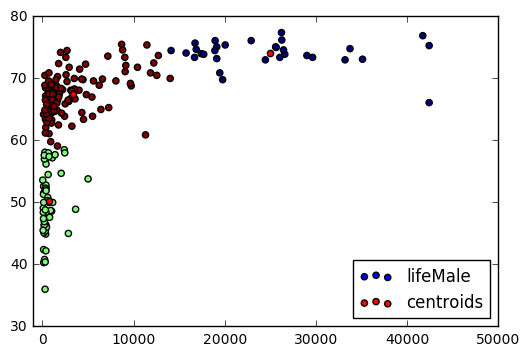

In [22]:
#Scatter of data along with predicted classes and their centroids
unData2=unData[['lifeMale', 'GDPperCapita']].dropna()
unData2.shape
plt.scatter( unData2.GDPperCapita, unData2.lifeMale, c=y_pred) #cmap='Blues')
y_ax=[i*1000 for i in ys]
plt.scatter(y_ax, xs, c='r', label='centroids')
plt.legend(loc = 'lower right')
plt.xlim(-1000)

In [23]:
centroids_fem, dist_fem = vq.kmeans(df_gdp_lifemale, 3)
centroids_fem

array([[ 5.11337862,  0.07117706],
       [ 6.88847957,  0.33598909],
       [ 7.56867234,  2.5192792 ]])

In [27]:
unData.lifeFemale.describe()  #finding out mean and std dev

C:\Users\Mnsh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    196.000000
mean      68.391837
std       11.041234
min       39.100000
25%             NaN
50%             NaN
75%             NaN
max       82.900000
Name: lifeFemale, dtype: float64

In [24]:
x_ax_fem=[i*11.04 for i in centroids_fem[:, 0]] #corrected back to original scale by multiplying with std
y_ax_fem=[i*9350  for i in centroids_fem[:, 1]] #to correct for the effect of vq.whiten (vector quantization)

(-1000, 50000.0)

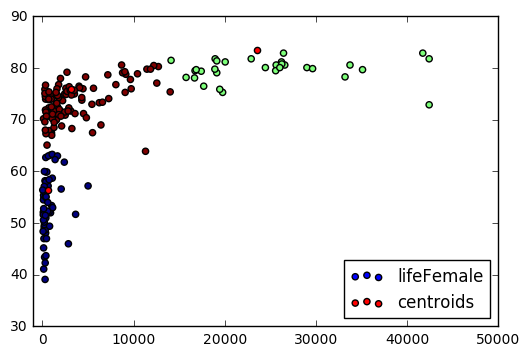

In [26]:
model = KMeans(3)
model.fit(df_gdp_lifefemale)
y_pred = model.predict(df_gdp_lifefemale)
unData3=unData[['lifeFemale', 'GDPperCapita']].dropna()
plt.scatter( unData3.GDPperCapita, unData3.lifeFemale, c=y_pred) #cmap='Blues')

plt.scatter(y_ax_fem, x_ax_fem, c='r', label='centroids')
plt.legend(loc = 'lower right')
plt.xlim(-1000)

In [29]:
unData.infantMortality.describe()

C:\Users\Mnsh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    201.000000
mean      43.477612
std       38.756041
min        2.000000
25%             NaN
50%             NaN
75%             NaN
max      169.000000
Name: infantMortality, dtype: float64

(-1000, 50000.0)

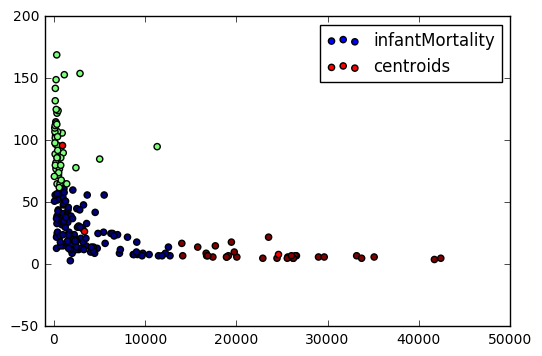

In [28]:
centroids_inf, dist_inf = vq.kmeans(df_gdp_infantMortality, 3)
#centroids_inf

x_ax_inf=[i*38.75 for i in centroids_inf[:, 0]] #corrected back to original scale by multiplying with std
y_ax_inf=[i*9350  for i in centroids_inf[:, 1]] #to correct for the effect of vq.whiten (vector quantization)

model_inf = KMeans(3)
model_inf.fit(df_gdp_infantMortality)
y_pred = model_inf.predict(df_gdp_infantMortality)
unData_inf=unData[['infantMortality', 'GDPperCapita']].dropna()
plt.scatter( unData_inf.GDPperCapita, unData_inf.infantMortality, c=y_pred) #cmap='Blues')
#y_ax=[i*1000 for i in ys]
plt.scatter(y_ax_inf, x_ax_inf, c='r', label='centroids')
plt.legend(loc = 'upper right')
plt.xlim(-1000)


In [30]:
#plt.scatter(ys, xs, c='r', label='centroids')

(-1000, 50000.0)

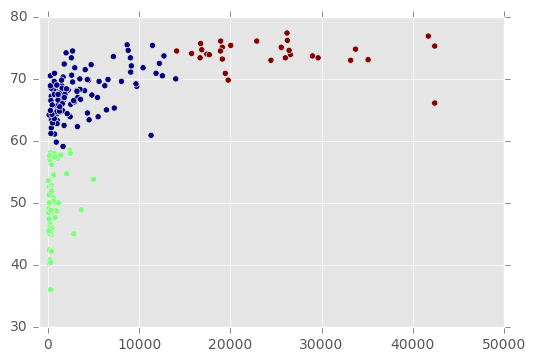

In [41]:
#Original data
import matplotlib.pyplot as plt
%matplotlib inline
unData2=unData[['lifeMale', 'GDPperCapita']].dropna()
unData2.shape
plt.scatter( unData2.GDPperCapita, unData2.lifeMale, c=y_pred) #cmap='Blues')
plt.xlim(-1000)

In [39]:
#unData[['lifeMale', 'GDPperCapita']].tail().dropna

In [46]:
#cheking stats
exp_whiten= unData[['lifeMale', 'GDPperCapita']]
exp_whiten.head()
exp_whiten.describe()

C:\Users\Mnsh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,lifeMale,GDPperCapita
count,196.00000,197.000000
mean,63.62551,6261.954315
std,9.78687,9355.659390
min,36.00000,36.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,77.40000,42416.000000


In summary K Means with k=3, was able to model the data into 3 cluster and all the features - life expectancy and infant mortality seem to work well and scatter plot look similar